In [139]:
import sys
import os
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline

sys.path.append(os.path.abspath(os.path.join("..", "src")))

df = pd.read_csv('../Data/Raw/Hotel Reservations.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29999 non-null  object 
 1   no_of_adults                          29999 non-null  int64  
 2   no_of_children                        29999 non-null  int64  
 3   no_of_weekend_nights                  29999 non-null  int64  
 4   no_of_week_nights                     29999 non-null  int64  
 5   type_of_meal_plan                     29999 non-null  object 
 6   required_car_parking_space            29999 non-null  int64  
 7   room_type_reserved                    29999 non-null  object 
 8   lead_time                             29999 non-null  int64  
 9   arrival_year                          29999 non-null  int64  
 10  arrival_month                         29999 non-null  int64  
 11  arrival_date   

In [140]:
df_clean = df.copy()
df_clean.drop(['Booking_ID'], axis=1, inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   type_of_meal_plan                     29999 non-null  object 
 5   required_car_parking_space            29999 non-null  int64  
 6   room_type_reserved                    29999 non-null  object 
 7   lead_time                             29999 non-null  int64  
 8   arrival_year                          29999 non-null  int64  
 9   arrival_month                         29999 non-null  int64  
 10  arrival_date                          29999 non-null  int64  
 11  market_segment_

In [141]:
encoder = OneHotEncoder(drop = 'if_binary')

cols_encoded = encoder.fit_transform(df_clean[['type_of_meal_plan','room_type_reserved', 'market_segment_type','booking_status']])

cols_encoded_array = cols_encoded.toarray()

new_cols = np.array(cols_encoded_array)

labels = encoder.get_feature_names_out(['type_of_meal_plan','room_type_reserved', 'market_segment_type','booking_status'])

df_cols_encoded = pd.DataFrame(cols_encoded_array, columns=labels)

df_cols_encoded = df_cols_encoded.astype(int)

df_clean = df_clean.join(df_cols_encoded)

df_clean.drop(['type_of_meal_plan','room_type_reserved', 'market_segment_type','booking_status'], axis=1, inplace=True)

In [142]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [143]:
room_type_cols = [
    'room_type_reserved_Room_Type 1',
    'room_type_reserved_Room_Type 2',
    'room_type_reserved_Room_Type 3',
    'room_type_reserved_Room_Type 4',
    'room_type_reserved_Room_Type 5',
    'room_type_reserved_Room_Type 6',
    'room_type_reserved_Room_Type 7'
]
prix_moyen_par_type = {}

for col in room_type_cols:
    # Filtrer les lignes où ce type est réservé et prix > 0
    mask = (df_clean[col] == 1) & (df_clean['avg_price_per_room'] > 0)
    prix_moyen = df_clean.loc[mask, 'avg_price_per_room'].mean()
    prix_moyen_par_type[col] = prix_moyen

print("Prix moyen par type :", prix_moyen_par_type)

# Fonction pour remplacer les 0 par le prix moyen correspondant
def remplacer_prix_moyen(row):
    if row['avg_price_per_room'] == 0:
        for col in room_type_cols:
            if row[col] == 1:
                return prix_moyen_par_type.get(col, np.nan)  # np.nan si pas trouvé
        return np.nan  # Si aucun type trouvé (cas improbable)
    else:
        return row['avg_price_per_room']

# Appliquer la fonction
df_clean['avg_price_per_room'] = df_clean.apply(remplacer_prix_moyen, axis=1)

Prix moyen par type : {'room_type_reserved_Room_Type 1': 97.2727575083911, 'room_type_reserved_Room_Type 2': 90.51525754884547, 'room_type_reserved_Room_Type 3': 101.4375, 'room_type_reserved_Room_Type 4': 126.433105401578, 'room_type_reserved_Room_Type 5': 132.40153846153845, 'room_type_reserved_Room_Type 6': 185.78694656488548, 'room_type_reserved_Room_Type 7': 208.38780000000003}


In [144]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [145]:
meal_cols = [
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 2',
    'type_of_meal_plan_Meal Plan 3'
]

# Somme sur les colonnes de formules repas
df_clean['meal_plan_selected'] = df_clean[meal_cols].sum(axis=1)

# Convertir en 0/1 (1 si au moins une formule choisie, 0 sinon)
df_clean['meal_plan_selected'] = df_clean['meal_plan_selected'].apply(lambda x: 1 if x > 0 else 0)

cols_to_drop = [
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 2',
    'type_of_meal_plan_Meal Plan 3',
    'type_of_meal_plan_Not Selected'
]

df_clean = df_clean.drop(columns=cols_to_drop)

In [146]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [147]:


# Supposons que df soit ton DataFrame
room_type_cols = [
    'room_type_reserved_Room_Type 1',
    'room_type_reserved_Room_Type 2',
    'room_type_reserved_Room_Type 3',
    'room_type_reserved_Room_Type 4',
    'room_type_reserved_Room_Type 5',
    'room_type_reserved_Room_Type 6',
    'room_type_reserved_Room_Type 7'
]

# Crée une seule colonne avec la valeur correspondant au numéro de type
df_clean['room_type_reserved'] = df_clean[room_type_cols].idxmax(axis=1).str.extract(r'Room_Type (\d)').astype(int)

# Supprime les colonnes one-hot originales
df_clean.drop(columns=room_type_cols, inplace=True)

In [148]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [149]:
# 1. total_nights
df_clean['total_nights'] = df_clean['no_of_week_nights'] + df_clean['no_of_weekend_nights']

# 2. total_people
df_clean['total_people'] = df_clean['no_of_adults'] + df_clean['no_of_children']

# 3. price_per_person avec réaffectation directe
df_clean['price_per_person'] = df_clean['avg_price_per_room'] / df_clean['total_people']
df_clean['price_per_person'] = df_clean['price_per_person'].replace([np.inf, -np.inf], np.nan)
df_clean['price_per_person'] = df_clean['price_per_person'].fillna(df_clean['avg_price_per_room'])

# 4. is_family
df_clean['is_family'] = (df_clean['no_of_children'] > 0).astype(int)

# 5. stay_duration_flag
df_clean['stay_duration_flag'] = (df_clean['total_nights'] > 7).astype(int)

In [150]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [151]:
df_clean['lead_time_category'] = pd.cut(
    df_clean['lead_time'],
    bins=[-1, 7, 30, 90, 180, 443],
    labels=['0-7j', '8-30j', '31-90j', '91-180j', '181j+']
)

In [152]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          29999 non-null  int64   
 1   no_of_children                        29999 non-null  int64   
 2   no_of_weekend_nights                  29999 non-null  int64   
 3   no_of_week_nights                     29999 non-null  int64   
 4   required_car_parking_space            29999 non-null  int64   
 5   lead_time                             29999 non-null  int64   
 6   arrival_year                          29999 non-null  int64   
 7   arrival_month                         29999 non-null  int64   
 8   arrival_date                          29999 non-null  int64   
 9   repeated_guest                        29999 non-null  int64   
 10  no_of_previous_cancellations          29999 non-null  int64   
 11  no

In [153]:
df_clean = pd.get_dummies(df_clean, columns=['lead_time_category'], drop_first=True)

In [154]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [155]:
lead_time_cols = [
    'lead_time_category_8-30j',
    'lead_time_category_31-90j',
    'lead_time_category_91-180j',
    'lead_time_category_181j+'
]

# Conversion de toutes ces colonnes en int (True -> 1, False -> 0)
df_clean[lead_time_cols] = df_clean[lead_time_cols].astype(int)


In [156]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [157]:
# df_clean.to_csv("../Data/Processed/Hotel Clean Final.csv", index=False)

In [158]:
from sklearn.model_selection import train_test_split

# critères de base
features = [
    'no_of_special_requests', 'price_per_person',
    'required_car_parking_space', 'total_nights', 'total_people',
    'room_type_reserved', 'repeated_guest', 'no_of_previous_cancellations',
    'meal_plan_selected', 'avg_price_per_room',
    'market_segment_type_Online', 'is_family', 'stay_duration_flag', 'lead_time_category_181j+', 'lead_time_category_91-180j','lead_time_category_31-90j', 'lead_time_category_8-30j'
]
x = df_clean[features]
# Critère à prédire
y = df_clean['booking_status_Not_Canceled']

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Random Forest Classifier:
Meilleurs hyperparamètres : {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Accuracy sur les données de test :  0.86
Score moyen par validation croisée :  0.86
Précision :  0.91
Rappel :  0.85
Erreur quadratique moyenne :  0.1568
Accuracy (via accuracy_score) :  0.8432
Matrice de confusion :
 [[1687  330]
 [ 611 3372]]


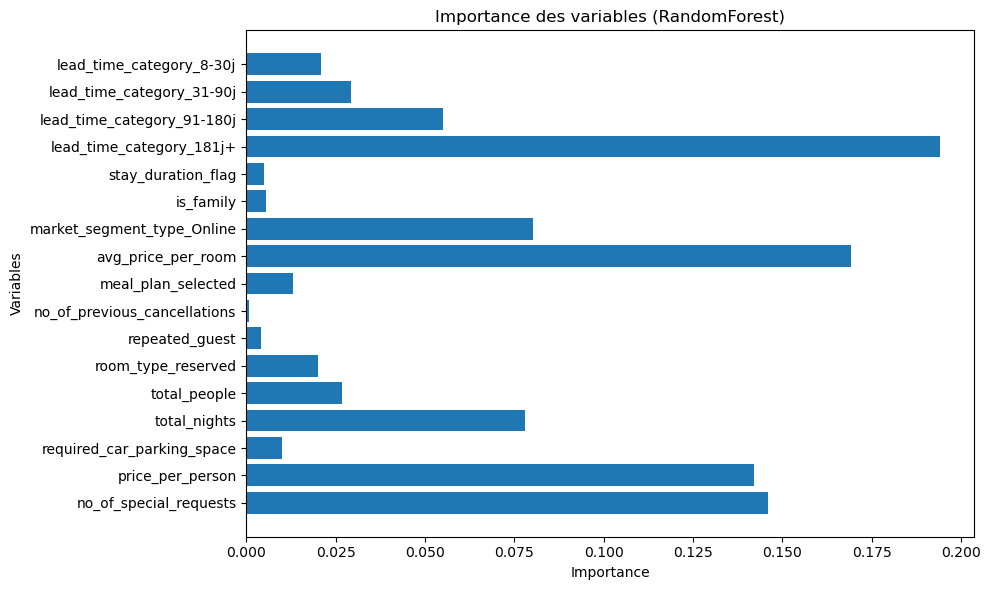

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1. Définir la grille d'hyperparamètres
param_dist_fine = {
    'n_estimators': np.arange(150, 301, 25),           # de 150 à 300 par pas de 25
    'max_depth': [10, 12, 14, 15, 16, 18, None],       # plusieurs profondeurs + None
    'min_samples_split': [2, 3, 4, 5],                  # splits plus fins
    'min_samples_leaf': [1, 2, 3],                      # minimum d'échantillons par feuille
    'max_features': ['sqrt', 'log2', None],             # essayer aussi None (toutes features)
    'bootstrap': [True, False]                           # test avec et sans bootstrap
}

# 2. Création du modèle de base
rf = RandomForestClassifier(random_state=42)

# 3. RandomizedSearchCV
random_search_fine = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_fine,
    n_iter=30,            # plus d’itérations pour plus de chance de trouver un bon combo
    cv=3,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 4. Entraînement
random_search_fine.fit(x_train, y_train)

# 5. Meilleur modèle
best_rf = random_search_fine.best_estimator_
print('Random Forest Classifier:')
print("Meilleurs hyperparamètres :", random_search_fine.best_params_)
best_rf = random_search_fine.best_estimator_

# 6. Prédictions
y_probs = best_rf.predict_proba(x_test)[:, 1]
optimal_threshold = 0.6869
y_pred_thresh = (y_probs >= optimal_threshold).astype(int) # Seuillage optionnel
y_pred = best_rf.predict(x_test)

# 7. Évaluation
print("Accuracy sur les données de test : ", np.round(best_rf.score(x_test, y_test), 2)) # 0.88
print("Score moyen par validation croisée : ",
      np.round(np.mean(cross_val_score(best_rf, x, y, cv=5)), 2)) # 0.88
print("Précision : ", np.round(precision_score(y_test, y_pred_thresh), 2)) # 0.89
print("Rappel : ", np.round(recall_score(y_test, y_pred_thresh), 2)) # 0.94
print("Erreur quadratique moyenne : ", np.round(mean_squared_error(y_test, y_pred_thresh), 4)) # 0.1164
print("Accuracy (via accuracy_score) : ", np.round(accuracy_score(y_test, y_pred_thresh), 4)) # 0.8836

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred_thresh)
print("Matrice de confusion :\n", cm)
#    [[1560  454]
#    [ 234 3661]]

# 9. Importance des variables
importances = best_rf.feature_importances_
features = x_train.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Importance des variables (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

In [162]:
# Etape 5 : Exporter le modèle en .pkl (= pickle) pour le réutiliser :

import pickle

# Utilisation du with pour contextualiser l'opération
# Ouvrir/Crééer une file avec pickle en écriture binaire (wb)
# et Dump les infos dans la file créée

with open('../Models/Hotel_Cancellations_Model_RandomForest.pkl', 'wb') as file:
    pickle.dump(random_search_fine, file)